In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("credit_card_transactions.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [6]:
df.isna().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

Geting totle percentage of fraudulent

In [7]:
isfraud = df[ df['is_fraud'] == 1 ]
isnotfraud = df[ df['is_fraud'] == 0 ] 

In [8]:
isfraudper = isfraud['is_fraud'].count() / df['is_fraud'].count() * 100
isnotfraudper = isnotfraud['is_fraud'].count() / df['is_fraud'].count() * 100

print(f"In total {isfraudper} percent are fraud which in numer are {isfraud['is_fraud'].count()}")

In total 0.5788651743883394 percent are fraud which in numer are 7506


How does fraud rate differ by transaction amount buckets?

In [9]:
fraudamt = int(isfraud['amt'].mean())
normalamt = int(isnotfraud['amt'].mean())
print(f"The avrage amount in a transaction of fraudster is {fraudamt} \nWhere a avrage amount in a normal transaction is {normalamt} ")

The avrage amount in a transaction of fraudster is 531 
Where a avrage amount in a normal transaction is 67 


Are frauds more common at specific times of day or days of the week?

In [10]:
ftime = pd.to_datetime(isfraud['trans_date_trans_time'])
fntime = pd.to_datetime(isnotfraud['trans_date_trans_time'])

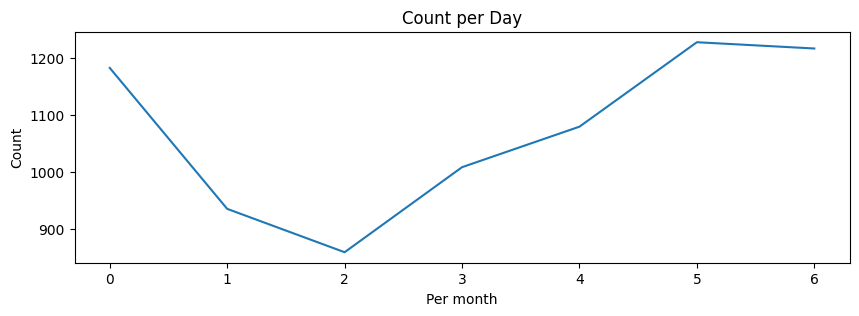

In [11]:
ftime.groupby(ftime.dt.day_of_week).agg("mean")
plt.figure(figsize=(10,3))
plt.plot(ftime.groupby(ftime.dt.day_of_week).agg("count"))
plt.title("Count per Day")
plt.xlabel("Per month")
plt.ylabel("Count")
plt.show()

In [12]:
ftime.groupby(ftime.dt.day_of_week).count()
ftime.dt.day_name()

2449       Wednesday
2472       Wednesday
2523       Wednesday
2546       Wednesday
2553       Wednesday
             ...    
1295399       Sunday
1295491       Sunday
1295532       Sunday
1295666       Sunday
1295733       Sunday
Name: trans_date_trans_time, Length: 7506, dtype: object

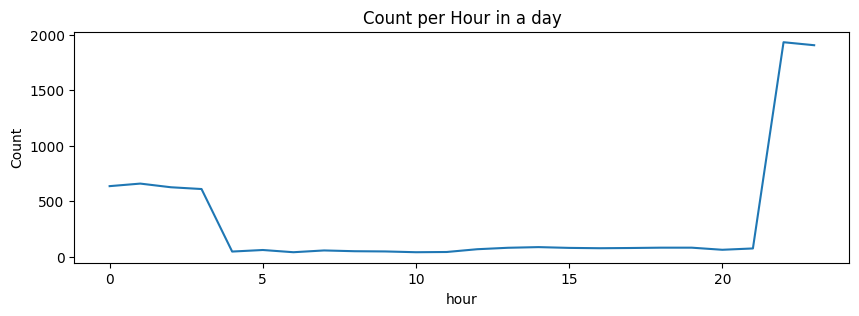

In [13]:
plt.figure(figsize=(10,3))
plt.plot(ftime.groupby(ftime.dt.hour).agg("count"))
plt.title("Count per Hour in a day")
plt.xlabel("hour")
plt.ylabel("Count")
plt.show()

# Which States / cities / merchants have the highest fraud rates

Highest fraud rate in Merchants is fraud_Rau and Sons in number 19

Highest fraud rate in city is Houston in number 39

Highest fraud rate in State is NY in number 555

In [14]:
isfraud.groupby("state").size()

state
AK     36
AL    215
AR    161
AZ     37
CA    326
CO    113
CT     16
DC     21
DE      9
FL    281
GA    146
HI      7
IA    142
ID     11
IL    248
IN    142
KS    156
KY    155
LA     91
MA     69
MD    157
ME    119
MI    238
MN    207
MO    191
MS    115
MT     32
NC    149
ND     57
NE    180
NH     59
NJ    118
NM     82
NV     47
NY    555
OH    321
OK    143
OR    149
PA    458
RI     15
SC    193
SD     74
TN    140
TX    479
UT     61
VA    198
VT     72
WA     96
WI    163
WV    146
WY    110
dtype: int64

How many transactions per user per hour is considered abnormal?

In [15]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
isfraud['trans_date_trans_time'] = pd.to_datetime(isfraud['trans_date_trans_time'])
isnotfraud['trans_date_trans_time'] = pd.to_datetime(isnotfraud['trans_date_trans_time'])

C:\Users\Samarth\AppData\Local\Temp\ipykernel_13668\4259734653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isfraud['trans_date_trans_time'] = pd.to_datetime(isfraud['trans_date_trans_time'])
C:\Users\Samarth\AppData\Local\Temp\ipykernel_13668\4259734653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isnotfraud['trans_date_trans_time'] = pd.to_datetime(isnotfraud['trans_date_trans_time'])


In [16]:
isfraud.groupby(isfraud['trans_date_trans_time'].dt.hour).count()['trans_date_trans_time'].mean()

np.float64(312.75)

In [17]:
isnotfraud.groupby(isnotfraud['trans_date_trans_time'].dt.hour).count()['trans_date_trans_time'].mean()

np.float64(53715.375)

What % of fraud comes from top 10 risky merchants

In [18]:
fraud_in_top_10_merchants = float(isfraud['merchant'].value_counts().sort_values(ascending=False)[:10].sum() / df['merchant'].value_counts().sort_values(ascending=False)[:10].sum() * 100)
print(f"{fraud_in_top_10_merchants} percent comes from top 10 risky merchants")

1.3893513333535128 percent comes from top 10 risky merchants


How many frauds are caught if we flag:

amount > X

In [19]:
isfraud['amt'].mean()
isnotfraud['amt'].mean()
temp = df[ df['amt'] >= isfraud['amt'].mean() ]
print(f"cought {int(temp['is_fraud'].value_counts()[1] / temp['is_fraud'].count() * 100)} percent in data") 

cought 26 percent in data


What is the financial loss due to fraud?

In [20]:
int(isfraud['amt'].sum()) / int(df['amt'].sum()) * 100

4.371828384133779